# Multi-sites


author: steeve.laquitaine@epfl.ch  
date: 2023.10.13  
last modified: 2023.10.13  


## Setup

create and activate env from `spikeinterf..`

In [1]:
# listen to changes
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import numpy as np 
import spikeinterface as si
import yaml

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

# set project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config

# SETUP PARAMETERS

# silico
data_conf, _ = get_config("silico_neuropixels", "npx_evoked").values()
PREP_PATH = data_conf["preprocessing"]["full"]["output"]["trace_file_path"]

# figure parameters
SAVE_FIG = False
SAVE_FIG_DATA = False
LOAD_FIG_DATA = True

with open("./conf/figures.yml", "r", encoding="utf-8") as yaml_file:
    fig_data_paths = yaml.load(yaml_file, Loader=yaml.FullLoader)

DURATION = 10  # in ms
SAMPFREQ = 20000  # in hz
STIM_START = 20110000  # 12070000  # identified location of the stimlus for epoch
START_AFTER_STIM_MS = 10  # start to plot 10 ms after the stimulus to capture most of its effect which seems delayed
N_SAMP = int(START_AFTER_STIM_MS / 1000 * SAMPFREQ)
LINEWIDTH = 0.5
LINEWIDTH_BORD = 0.25
PLOT_Y_PITCH = 20
n_timepoints = int(DURATION * SAMPFREQ / 1000)
Y_MAX = PLOT_Y_PITCH * 95


# FIGURE SETTINGS
FIGSIZE = (1.3, 5.9)
# colors
COLOR_E = [1, 0.49, 0]
# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 0.5  # 1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
savefig_cfg = {"transparent": True, "dpi": 300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False  # no legend frame

2024-12-13 15:06:29,889 - root - utils.py - get_config - INFO - Reading experiment config.
2024-12-13 15:06:29,946 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Load dataset

In [ ]:
if SAVE_FIG_DATA:
    
    Recording = si.load_extractor(PREP_PATH)
    layers = Recording.get_property("layers")
    PERIOD = np.arange(
        STIM_START + N_SAMP,
        STIM_START + N_SAMP + n_timepoints,
        1,
    )
    prep_traces = Recording.get_traces()
    n_contacts = prep_traces.shape[1]
    
    fig_data = {
        "trace": prep_traces[PERIOD, :],
        "layers": layers
    }
    
    # save figure data
    np.save(fig_data_paths["fig2i_spacetime_evok_npx"], fig_data)
elif LOAD_FIG_DATA:
    fig_data = np.load(fig_data_paths["fig2i_spacetime_evok_npx"], allow_pickle=True).item()    

In [3]:
# get column one sites per layer
col1_site_out = np.where(fig_data["layers"][:96] == "Outside")[0]
col1_site_l1 = np.where(fig_data["layers"][:96] == "L1")[0]
col1_site_l2_3 = np.where((fig_data["layers"][:96] == "L2_3"))[0]
col1_site_l4 = np.where(fig_data["layers"][:96] == "L4")[0]
col1_site_l5 = np.where(fig_data["layers"][:96] == "L5")[0]
col1_site_l6 = np.where(fig_data["layers"][:96] == "L6")[0]

### Plot

* We identified the stimulus location (sample indices) at the start of each stimulus epoch (200 ms block). Sample 20110000 produced the highest response from the most active L5 pyramidal cell (3880652).
* see stimulus.ipynb (in methods)

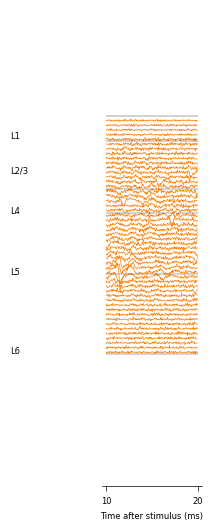

In [4]:
# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0
for contact_i in np.arange(0, 96, 1):

    # mark the first trace of each layer
    # layer 6
    if contact_i == col1_site_l6[0]:
        ax.hlines(
            y=0.98 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -210,
            0.99 * pos_up,
            "%s" % ("L6"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )
    # layer 5
    if contact_i == col1_site_l5[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -210,
            0.99 * pos_up,
            "%s" % ("L5"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )
    # layer 4
    if contact_i == col1_site_l4[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -210,
            0.99 * pos_up,
            "%s" % ("L4"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )
    # layer 2
    if contact_i == col1_site_l2_3[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -210,
            1.05 * pos_up,
            "%s" % ("L2/3"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )
    # layer 1
    if contact_i == col1_site_l1[0]:
        ax.hlines(
            y=0.98 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
        # label layer
        ax.text(
            # 610,
            -210,
            0.99 * pos_up,
            "%s" % ("L1"),
            size=plt.rcParams["font.size"],
            zorder=100,
            color="k",
            ha="left",
        )
    # Outside
    if contact_i == 73:
        ax.hlines(
            y=pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=LINEWIDTH_BORD
        )

    # do not plot sites outside the cortex
    if contact_i in col1_site_out:
        pass

    # all other traces
    else:
        ax.plot(
            fig_data["trace"][:, contact_i] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_E,
        )
    pos_up += PLOT_Y_PITCH

# legend
ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints], [START_AFTER_STIM_MS, START_AFTER_STIM_MS + DURATION])
ax.set_xlabel("Time after stimulus (ms)")
ax.set_ylim([-10, Y_MAX + 10])
plt.yticks([])

# disconnect axes (R style)
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("right")

# save figures
if SAVE_FIG:
    plt.savefig(
        "figures/0_validation/2_dynamics/fig2c_spacetime_evok_npx.svg", **savefig_cfg
    )